### 2 - PRÉ-PROCESSAMENTO - BALANCEAMENTO DE CLASSES

In [1]:
# CARREGAR BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# CARREGAR DADOS
df_reviews = pd.read_csv('dados_reviews.csv')

In [3]:
# VERIFICAR VALORES NA
df_reviews[['content']].isna().values.any()

True

In [4]:
# DADOS PARA GRÁFICO 1 DE QUANTIDADE DE AVALIAÇÕES POR NOTAS
dados_g1 = df_reviews[df_reviews['score'] != 0]
dados_g1 = dados_g1.dropna(subset = ['content']).reset_index(drop = True)
print("Total de registros com comentários:", len(dados_g1))
dados_g1 = dados_g1.groupby(['score']).size()
dados_g1 = pd.DataFrame(data = dados_g1, columns = ['quantidade']).reset_index()
dados_g1 

Total de registros com comentários: 2300618


,score,quantidade
0,1,376787
1,2,83952
2,3,106381
3,4,203569
4,5,1529929


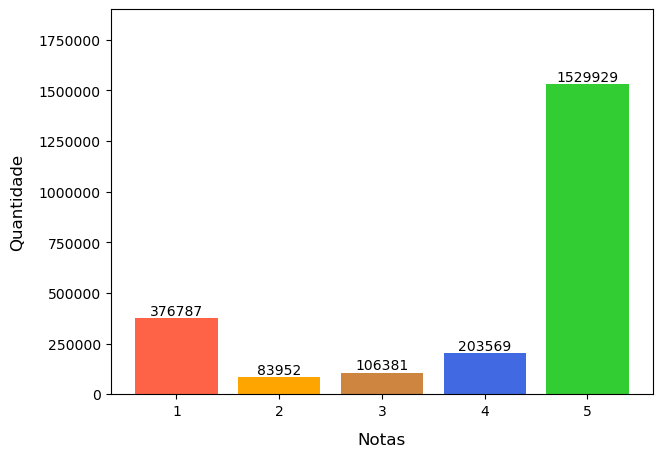

In [5]:
# GRÁFICO 1 - QUANTIDADE DE AVALIAÇÕES POR NOTAS
figura, axes = plt.subplots(figsize = (7, 5))

notas = dados_g1['score']
quantidade = dados_g1['quantidade']

cor_barras = ['tomato','orange', 'peru', 'royalblue', 'limegreen']

grafico1 = axes.bar(notas, quantidade, width = 0.8, color = cor_barras)
axes.set_xlabel('Notas', fontsize = 12, labelpad = 10)
axes.set_ylabel('Quantidade', fontsize = 12, labelpad = 10)
#axes.set_title('Quantidade de Avaliações por Notas (1 a 5)')
axes.set(ylim = (0, 1900000))
axes.bar_label(grafico1, quantidade, size = 10, label_type = "edge")
#axes.grid(color = 'gray', linestyle = '-', linewidth = 0.5)
axes.ticklabel_format(style = 'plain', axis = 'y')
plt.savefig('grafico1.png', format ='png', bbox_inches = 'tight')
plt.show()

In [6]:
# FUNÇÃO PARA TRANSFORMAÇÃO DAS CLASSES
# Score: 1 e 2 como Negativo 
# Score: 3 como Neutro 
# Score: 4 e 5 como Positivo 
    
def classe(score):
    if score < 3:
        return "negativo"
    elif score == 3:
        return "neutro"
    else:
        return "positivo"

In [7]:
# CRIAR COLUNA DE CLASSE COM BASE NO ATRIBUTO SCORE
df_reviews['sentimento'] = df_reviews['score'].apply(classe)

In [8]:
# CHECAR DISTRIBUIÇÃO DAS CLASSES - TOTAL DE CADA CLASSE
df_reviews[['sentimento']].value_counts()

sentimento
positivo      1733691
negativo       460772
neutro         106401
dtype: int64

In [9]:
# VERIFICAR O BALANCEAMENTO DAS CLASSES DOS DADOS PARA GRÁFICO 2 
dados_g2 = df_reviews[['sentimento', 'score', 'content', 'replyContent']]
dados_g2 = dados_g2.groupby(['sentimento']).count().reset_index()
dados_g2

,sentimento,score,content,replyContent
0,negativo,460772,460744,211050
1,neutro,106401,106381,41488
2,positivo,1733691,1733498,521276


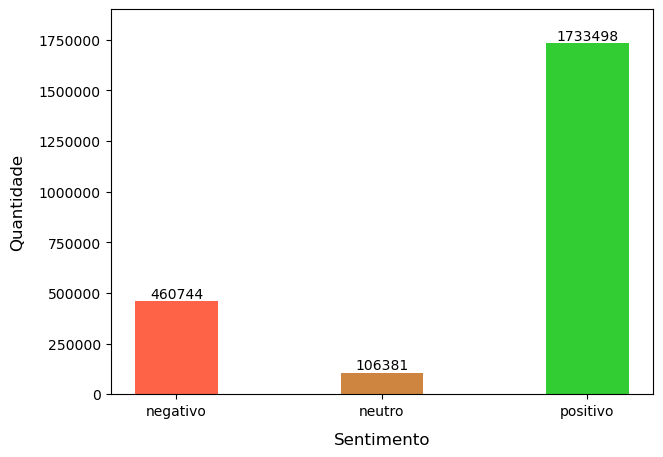

In [10]:
# GRÁFICO 2 - QUANTIDADE DE AVALIAÇÕES POR SENTIMENTO
figura, axes = plt.subplots(figsize = (7, 5))

sentimento = dados_g2['sentimento']
quantidade = dados_g2['content']

cor_barras = ['tomato', 'peru', 'limegreen']

grafico2 = axes.bar(sentimento, quantidade, width = 0.4, color = cor_barras)
axes.set_xlabel('Sentimento', fontsize = 12, labelpad = 10)
axes.set_ylabel('Quantidade', fontsize = 12, labelpad = 10)
#axes.set_title('Quantidade de Avaliações por Notas (1 a 5)')
axes.set(ylim = (0, 1900000))
axes.bar_label(grafico2, quantidade, size = 10, label_type = "edge")
#axes.grid(color = 'gray', linestyle = '-', linewidth = 0.5)
axes.ticklabel_format(style = 'plain', axis = 'y')
plt.savefig('grafico2.png', format ='png', bbox_inches = 'tight')

plt.show()

In [11]:
# VERIFICAR A EXISTÊNCIA DE VALORES NaN NO CAMPO DE COMENTÁRIOS
df_reviews[['content']].isna().values.any() # ou df_reviews[['content']].isna() # notnull()

True

In [12]:
# EXCLUIR OBSERVAÇÕES COM VALORES NaN NO CAMPO DE COMENTÁRIO
df_reviews = df_reviews.dropna(subset = ['content']).reset_index(drop = True)
df_reviews.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app,sentimento
0,ed5fe77c-14a7-469b-a1c4-53dee2e4b67d,João Victor Viana de Figueiredo,https://play-lh.googleusercontent.com/a-/AFdZu...,"Sendo um assinante Prime, considero que é um ó...",5,70,24.12.6.100,2022-07-19 22:58:21,NaN,NaN,Amazon,positivo
1,33b6e638-8373-4ec9-a0b4-4260cf0a91c1,Felipe Teixeira,https://play-lh.googleusercontent.com/a/AItbvm...,Prós - Comparado ao aplicativo das concorrente...,3,1558,20.20.0.100,2020-10-13 12:31:34,NaN,NaN,Amazon,neutro
2,490680d7-e9f4-4fde-bf8e-27b8b1c20e3b,Renan Cavagnolli,https://play-lh.googleusercontent.com/a/AItbvm...,"Tem alguns problemas. Ex: Na navegação, quando...",3,1883,20.10.0.100,2020-05-25 03:41:07,NaN,NaN,Amazon,neutro


In [13]:
# VERIFICAR A EXISTÊNCIA DE VALORES NaN NO CAMPO DE COMENTÁRIOS APÓS RETIRADA DE VALORES NaN 
df_reviews[['content']].isna().values.any()

False

In [14]:
# RESULTADOS APÓS RETIRADA DE VALORES NaN DOS COMENTÁRIOS
df_reviews[['sentimento']].value_counts()

sentimento
positivo      1733498
negativo       460744
neutro         106381
dtype: int64

In [15]:
# AMOSTRAGEM BALANCEADA DAS CLASSES
df_neutro = df_reviews[df_reviews['sentimento'] == 'neutro']

In [16]:
df_binario = df_reviews[df_reviews['sentimento'] != 'neutro']
df_binario = df_binario.groupby("sentimento").sample(n = 106381, random_state = 1)

In [17]:
# DATAFRAME COM TRÊS CLASSES
df_ternario = [df_neutro, df_binario]
df_ternario = pd.concat(df_ternario)

In [18]:
# RESULTADO DA AMOSTRAGEM BALANCEADA DAS CLASSES
df_ternario[['sentimento']].value_counts()

sentimento
negativo      106381
neutro        106381
positivo      106381
dtype: int64

In [19]:
# GRÁFICO 3 - # DADOS PARA GRÁFICO 3 DE QUANTIDADE DE AVALIAÇÕES POR SENTIMENTO
dados_g3 = df_ternario.groupby(['sentimento']).size()
dados_g3 = pd.DataFrame(data = dados_g3, columns = ['quantidade']).reset_index()
dados_g3 

,sentimento,quantidade
0,negativo,106381
1,neutro,106381
2,positivo,106381


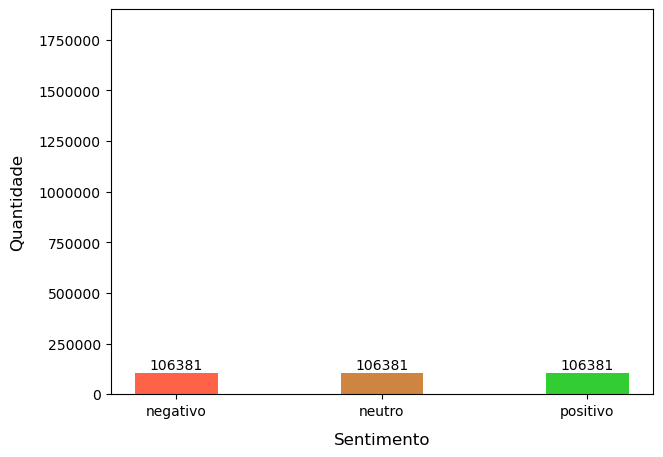

In [20]:
# GRÁFICO 3 -  QUANTIDADE DE AVALIAÇÕES POR SENTIMENTO - BALANCEADA
figura, axes = plt.subplots(figsize = (7, 5))

sentimento = dados_g3['sentimento']
quantidade = dados_g3['quantidade']

cor_barras = ['tomato', 'peru', 'limegreen']

grafico3 = axes.bar(sentimento, quantidade, width = 0.4, color = cor_barras)
axes.set_xlabel('Sentimento', fontsize = 12, labelpad = 10)
axes.set_ylabel('Quantidade', fontsize = 12, labelpad = 10)
#axes.set_title('Quantidade de Avaliações por Notas (1 a 5)')
axes.set(ylim = (0, 1900000))
axes.bar_label(grafico3, quantidade, size = 10, label_type = "edge")
#axes.grid(color = 'gray', linestyle = '-', linewidth = 0.5)
axes.ticklabel_format(style = 'plain', axis = 'y')
plt.savefig('grafico3.png', format ='png', bbox_inches = 'tight')

plt.show()

In [21]:
# SALVAR ARQUIVOS
df_ternario.to_csv('df_reviews_ternario.csv', index = False)  